In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import unicodedata
import re
import json

import acquire
import prepare

All acquire functions loaded properly.
All prepare functions successfully loaded.


[nltk_data] Downloading package wordnet to /Users/luke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Exercises

## 1. Spam Data

### a. Load the spam data set.

In [2]:
# Provided clean function:

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
# Creating the df:

df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Using my own clean function:

df['basic_clean'] = df.text.apply(prepare.basic_clean)
df.head()

,label,text,basic_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [5]:
df['tokenized'] = df.text.apply(prepare.tokenize)
df.head()

,label,text,basic_clean,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ..."


In [6]:
df['stem_text'] = df.text.apply(prepare.stem)
df.head()

,label,text,basic_clean,tokenized,stem_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun..."


In [7]:
df['lemma_text'] = df.text.apply(prepare.lemmatize)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around..."


In [8]:
# Removing stopwords:

df['text_filtered'] = df.lemma_text.apply(prepare.remove_stopwords)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though"


In [9]:
# Adding the length of the document (number of words)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]"


#### Adding word length column:

In [10]:
# apparently I can only run this once...
len(df.words[0])

12

In [11]:
df['doc_length'] = [len(wordlist) for wordlist in df.words]
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2...",19
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]",6
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]",6


In [ ]:
# Should be ready for explore now.

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [54]:
# So first off, need to split the spam data from the ham data.

ham_words = " ".join(df[df.label == 'ham'].text_filtered)
spam_words = " ".join(df[df.label == 'spam'].text_filtered)
all_words = " ".join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)
spam_words[0:100]

'Free entrywkly comp win FA Cup final tkts 21st May 2005. Text FA 87121 receive entry question(std tx'

In [ ]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

In [16]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"Go until jurong point , crazy .. Available onl...","Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat...",12,"[(o, jurong), (jurong, point), (point, crazy),..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,Ok lar ... Joking wif u oni ...,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]",4,"[(k, lar), (lar, oking), (oking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2...",19,"[(ree, entrywkly), (entrywkly, comp), (comp, w..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,U dun say so early hor ... U c already then sa...,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]",6,"[(dun, say), (say, early), (early, horc), (hor..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"Nah I don ' t think he goes to usf , he lives ...","nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]",6,"[(ahthink, go), (go, usf), (usf, life), (life,..."


In [17]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(Please, call)          25
(customer, service)     23
(ï¿½1000, cash)         19
(To, claim)             19
(GUARANTEED., Call)     19
(prize, GUARANTEED.)    19
(This, 2nd)             18
(URGENT!, Your)         17
(PRIVATE!, Your)        16
(Valid, 12hrs)          16
(land, line.)           16
(PO, Box)               16
(Account, Statement)    16
(selected, receive)     15
(call, customer)        15
(Call, MobileUpd8)      14
(draw, show)            14
(We, trying)            14
(please, call)          14
(trying, contact)       14
dtype: int64

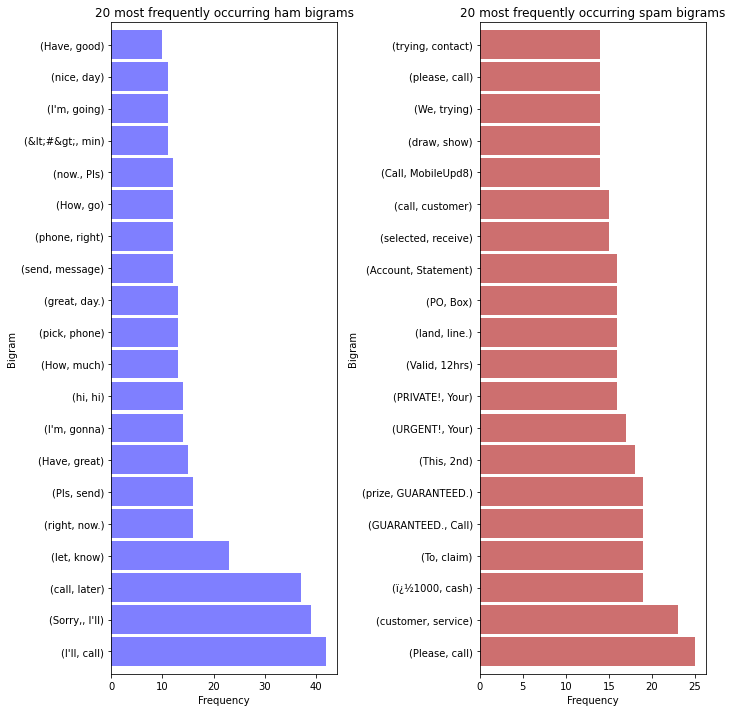

In [25]:
plt.subplot(121)
ham_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='firebrick', width=.9, figsize=(10, 10), alpha=.65)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## Exploring with word clouds

In [26]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'Please call': 25,
 'customer service': 23,
 'ï¿½1000 cash': 19,
 'To claim': 19,
 'GUARANTEED. Call': 19,
 'prize GUARANTEED.': 19,
 'This 2nd': 18,
 'URGENT! Your': 17,
 'PRIVATE! Your': 16,
 'Valid 12hrs': 16,
 'land line.': 16,
 'PO Box': 16,
 'Account Statement': 16,
 'selected receive': 15,
 'call customer': 15,
 'Call MobileUpd8': 14,
 'draw show': 14,
 'We trying': 14,
 'please call': 14,
 'trying contact': 14}

(-0.5, 799.5, 399.5, -0.5)

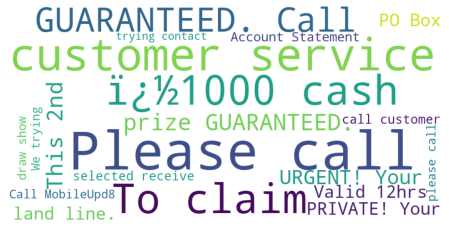

In [64]:
# Using the example that we learned in class:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Using an image as a mask/frame for word cloud

- Using the "Ham" words to create a wordcloud in the same of an actual ham.

In [35]:
from PIL import Image

In [36]:
mask = np.array(Image.open('ham_mask_finished.png'))

In [38]:
mask.shape

(412, 584, 4)

In [ ]:
wc = WordCloud(backgroud_color = 'black', mask = mask, mode = 'RBG', width = 1000, max_words = 200, height = 1000, random_date = 1)

wc.generate(text)

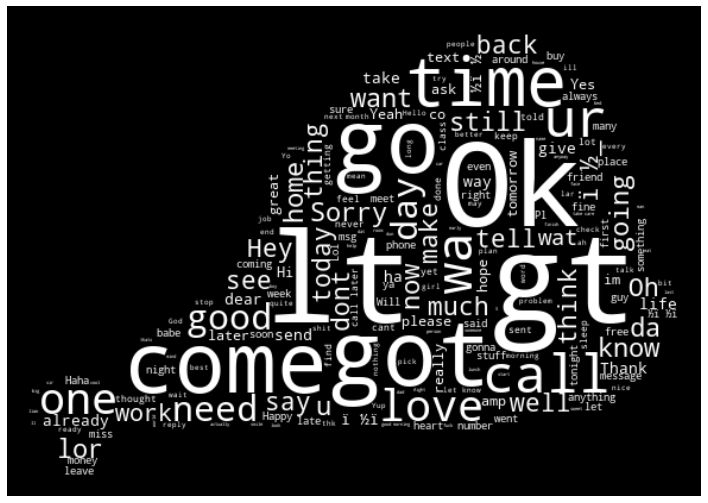

In [46]:
wc = WordCloud(background_color='black', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "white", width=1000, max_words=200, height=1000, random_state=1)
wc.generate(ham_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

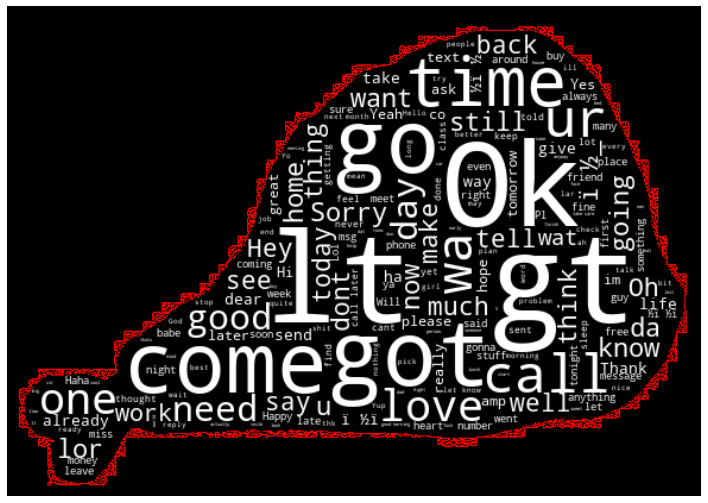

In [65]:
wc = WordCloud(background_color='black', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "white", width=1000, max_words=200, height=1000, random_state=1,
              contour_width = .1, contour_color = 'red')
wc.generate(ham_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### Takeaways:

- It was interesting to see how the numpy array actually works in this instance. I added the contour lines so that I could see what the numpy "mask" was actually doing, and you can see that it's drawing in roughly square lines, somewhat like a painter would use drafting/masking tape to cover over an area they don't want to paint, but that isn't exactly a precise cutout of the shape they're painting. 
- I was able to learn more about the arguments available in .imshow(), and also learn more about the different types of interpolation. Bilinear here basically "smudges" or blurs the outline a bit so that it's not quite as harsh an edge, meaning that the edge of the wordcloud appears to be a bit more smooth. I couldn't also used quadric or guassian or a number of others, but that would've increased the processing time for this image.

### c. Is there any overlap in the bigrams for the spam data and the ham data?

- It doesn't appear there is any overlap.

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data

In [53]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, GUARANTEED., Call)             19
(call, customer, service)              15
(Your, 2003, Account)                  13
(2003, Account, Statement)             13
(PRIVATE!, Your, 2003)                 13
(land, line., Claim)                   13
(We, trying, contact)                  13
(This, 2nd, attempt)                   12
(show, 800, un-redeemed)               12
(URGENT!, We, trying)                  10
(WON, guaranteed, ï¿½1000)             10
(customer, service, representative)    10
(guaranteed, ï¿½1000, cash)            10
(URGENT!, Your, Mobile)                10
(750, anytime, network)                 9
(800, un-redeemed, S.)                  9
(un-redeemed, S., I.)                   9
(S., I., M.)                            9
(draw, txt, MUSIC)                      9
(M., points., Call)                     9
dtype: int64

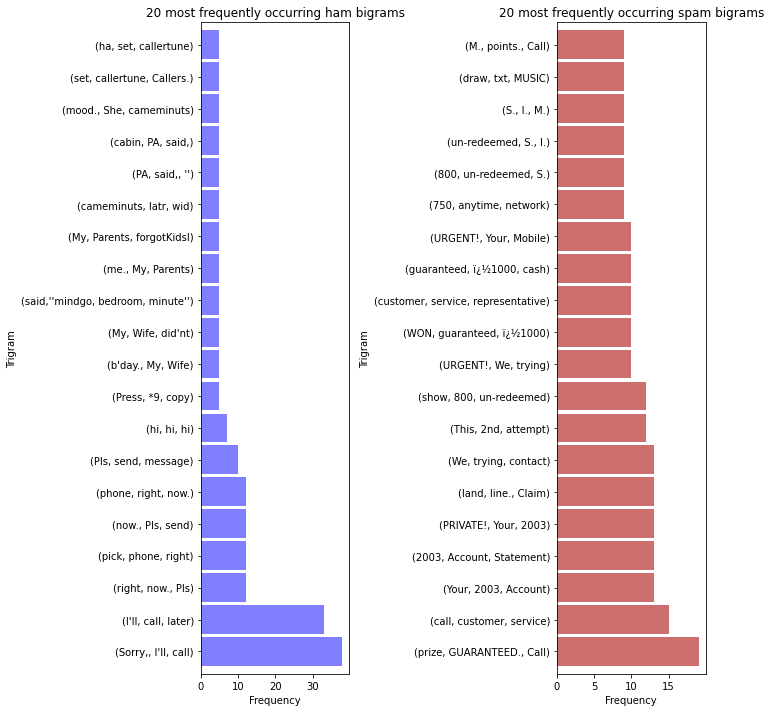

In [55]:
plt.subplot(121)
ham_trigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='firebrick', width=.9, figsize=(10, 10), alpha=.65)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

#### Takeaway:

- There doesn't seem to be any significant overlap of terms (looking at a high level).
- The words within each trigram while having some overlap (of course) doesn't seem to hvae much meaning from human eyes, but perhaps there will be more meaning when it comes to the modeling.

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.